In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
train_dir = '../input/american-sign-language/ASL_Dataset/Train'
test_dir = '../input/american-sign-language/ASL_Dataset/Test'

In [4]:
Name=[]
for file in os.listdir(train_dir):
    Name+=[file]
print(Name)
print(len(Name))

['N', 'R', 'Space', 'B', 'I', 'F', 'H', 'E', 'U', 'M', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', 'C', 'P', 'L', 'W', 'D', 'Nothing', 'J']
28


In [5]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [6]:
dataset=[]
count=0
for file in os.listdir(train_dir):
    path=os.path.join(train_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(40,40))
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
    count=count+1

In [7]:
testset=[]
count=0
for file in os.listdir(test_dir):
    path=os.path.join(test_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(40,40))
        image=img_to_array(image)
        image=image/255.0
        testset+=[[image,count]]
    count=count+1

In [9]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [10]:
labels1=to_categorical(labels0)
labels=np.array(labels1)

In [11]:
data=np.array(data)
test=np.array(test)

In [15]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [16]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(132536, 40, 40, 3)
(33134, 40, 40, 3)
(132536, 28)
(33134, 28)


In [17]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

# **cnn model**

In [38]:
cnn4_model = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(40,40,3)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax'),
 
])

In [39]:
cnn4_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
cnn4_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 40, 40, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 20, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 6400)              0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [41]:
his_cnn= cnn4_model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=5)

Epoch 1/5
4142/4142 [==============================] - 240s 58ms/step - loss: 1.2663 - accuracy: 0.5613 - val_loss: 0.3443 - val_accuracy: 0.8901
Epoch 2/5
4142/4142 [==============================] - 238s 57ms/step - loss: 0.5345 - accuracy: 0.8076 - val_loss: 0.1556 - val_accuracy: 0.9574
Epoch 3/5
4142/4142 [==============================] - 237s 57ms/step - loss: 0.3414 - accuracy: 0.8801 - val_loss: 0.0963 - val_accuracy: 0.9732
Epoch 4/5
4142/4142 [==============================] - 237s 57ms/step - loss: 0.2450 - accuracy: 0.9153 - val_loss: 0.1925 - val_accuracy: 0.9225
Epoch 5/5
4142/4142 [==============================] - 238s 58ms/step - loss: 0.1914 - accuracy: 0.9345 - val_loss: 0.0629 - val_accuracy: 0.9791


In [42]:
y_pred=cnn4_model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

1036/1036 [==============================] - 14s 13ms/step
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1222
           1       0.99      0.98      0.98      1197
           2       1.00      1.00      1.00      1159
           3       1.00      0.98      0.99      1201
           4       0.99      0.99      0.99      1220
           5       0.99      1.00      1.00      1198
           6       1.00      0.97      0.98      1173
           7       0.98      1.00      0.99      1165
           8       0.94      1.00      0.97       899
           9       0.78      1.00      0.88      1213
          10       1.00      0.91      0.95      1219
          11       0.99      0.98      0.99      1177
          12       1.00      1.00      1.00      1168
          13       1.00      1.00      1.00      1177
          14       0.96      1.00      0.98      1222
          15       0.97      0.99      0.98      1153
          16       1.0

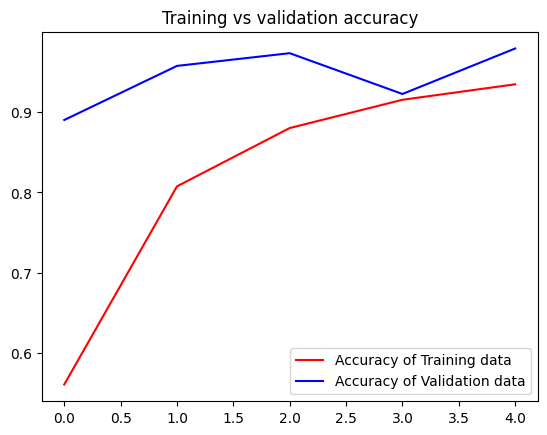

<Figure size 640x480 with 0 Axes>

In [43]:
get_acc = his_cnn.history['accuracy']
value_acc = his_cnn.history['val_accuracy']
get_loss = his_cnn.history['loss']
validation_loss = his_cnn.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

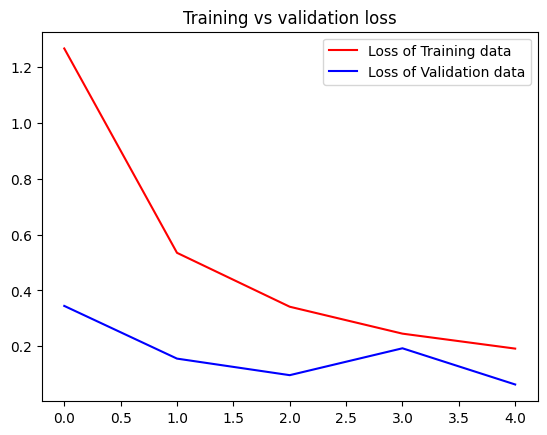

<Figure size 640x480 with 0 Axes>

In [44]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# **Densenet 201**

In [49]:
pretrained_model4 = tf.keras.applications.DenseNet201(input_shape=(40,40,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model4.trainable = False

In [51]:
inputs3 = pretrained_model4.input
x3 = tf.keras.layers.Dense(64, activation='relu')(pretrained_model4.output)
outputs3 = tf.keras.layers.Dense(28, activation='softmax')(x3)
dense1_model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [52]:
dense1_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
his_dense=dense1_model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=10)

Epoch 1/10
4142/4142 [==============================] - 859s 204ms/step - loss: 0.5749 - accuracy: 0.8264 - val_loss: 0.2276 - val_accuracy: 0.9252
Epoch 2/10
4142/4142 [==============================] - 847s 204ms/step - loss: 0.3279 - accuracy: 0.8939 - val_loss: 0.1472 - val_accuracy: 0.9535
Epoch 3/10
4142/4142 [==============================] - 794s 192ms/step - loss: 0.2901 - accuracy: 0.9057 - val_loss: 0.1268 - val_accuracy: 0.9569
Epoch 4/10
4142/4142 [==============================] - 845s 204ms/step - loss: 0.2642 - accuracy: 0.9131 - val_loss: 0.1249 - val_accuracy: 0.9564
Epoch 5/10
4142/4142 [==============================] - 788s 190ms/step - loss: 0.2469 - accuracy: 0.9185 - val_loss: 0.1266 - val_accuracy: 0.9547
Epoch 6/10
4142/4142 [==============================] - 791s 191ms/step - loss: 0.2340 - accuracy: 0.9233 - val_loss: 0.0941 - val_accuracy: 0.9681
Epoch 7/10
4142/4142 [==============================] - 849s 205ms/step - loss: 0.2340 - accuracy: 0.9229 - val_

In [54]:
y_pred2=dense1_model.predict(testx)
pred=np.argmax(y_pred2,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

1036/1036 [==============================] - 154s 145ms/step
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1222
           1       0.99      0.93      0.96      1197
           2       1.00      0.99      1.00      1159
           3       1.00      0.98      0.99      1201
           4       0.95      0.96      0.96      1220
           5       1.00      1.00      1.00      1198
           6       0.99      0.97      0.98      1173
           7       1.00      0.83      0.91      1165
           8       0.89      0.98      0.93       899
           9       0.98      0.94      0.96      1213
          10       0.94      0.83      0.88      1219
          11       0.90      0.97      0.93      1177
          12       0.96      0.99      0.98      1168
          13       0.99      1.00      0.99      1177
          14       0.67      1.00      0.81      1222
          15       0.97      0.98      0.98      1153
          16       1

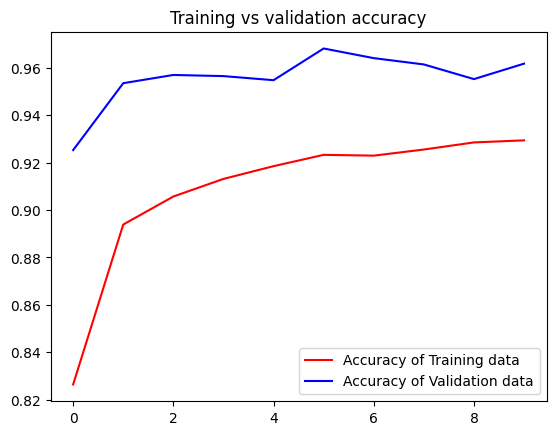

<Figure size 640x480 with 0 Axes>

In [55]:
get_acc = his_dense.history['accuracy']
value_acc = his_dense.history['val_accuracy']
get_loss = his_dense.history['loss']
validation_loss = his_dense.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

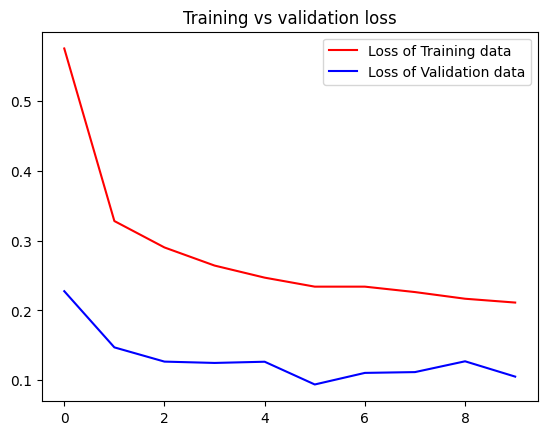

<Figure size 640x480 with 0 Axes>

In [56]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [57]:
print(test.shape)
pred2=dense1_model.predict(test)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]

(112, 40, 40, 3)
4/4 [==============================] - 1s 134ms/step
(112, 28)


In [58]:
ANS=testlabels0

In [59]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9732142857142857


In [61]:
dense1_model.save("densenet201.h5")

In [62]:
cnn4_model.save("cnn.h5")

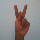

In [63]:
load_img("../input/american-sign-language/ASL_Dataset/Test/K/3004.jpg",target_size=(40,40))

In [64]:
image=load_img("../input/american-sign-language/ASL_Dataset/Test/K/3004.jpg",target_size=(40,40))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [66]:
prediction=cnn4_model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 30ms/step
Prediction is K.


In [67]:
prediction=dense1_model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 64ms/step
Prediction is K.


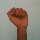

In [71]:
load_img("/kaggle/input/american-sign-language/ASL_Dataset/Test/A/3002.jpg",target_size=(40,40))

In [70]:
image=load_img("/kaggle/input/american-sign-language/ASL_Dataset/Test/A/3002.jpg",target_size=(40,40))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [72]:
prediction=cnn4_model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 37ms/step
Prediction is A.


In [73]:
prediction=dense1_model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 66ms/step
Prediction is A.
